In [1]:
import sys
import numpy             as np
import tensorflow        as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gudhi.representations as gdr
import gudhi.tensorflow.perslay as gdtf

In [2]:
diagrams = [np.array([[0.,4.],[1.,2.],[3.,8.],[6.,8.]]), np.array([[3.,6.],[4.,5.]])]

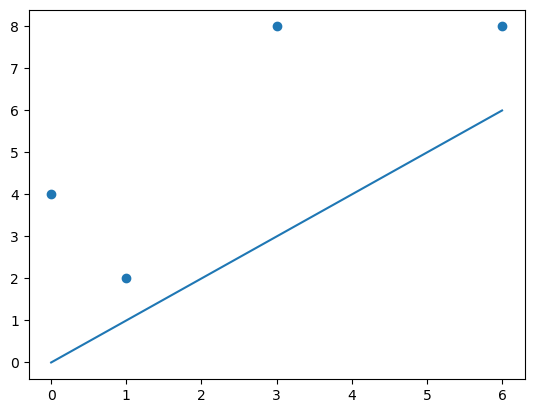

In [3]:
plt.scatter(diagrams[0][:,0], diagrams[0][:,1])
plt.plot([0.,6.],[0.,6.])
plt.show()

In [4]:
diagrams = gdr.DiagramScaler(use=True, scalers=[([0,1], MinMaxScaler())]).fit_transform(diagrams)

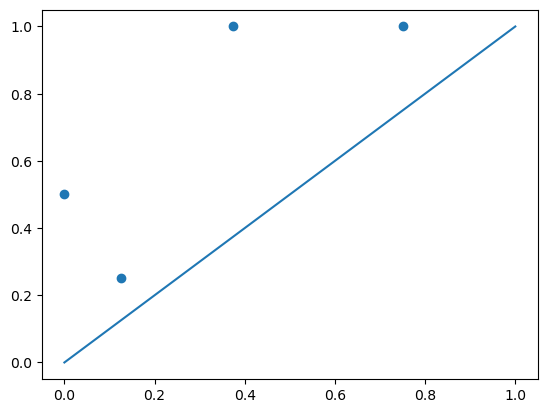

In [5]:
plt.scatter(diagrams[0][:,0], diagrams[0][:,1])
plt.plot([0.,1.],[0.,1.])
plt.show()

In [6]:
diagrams = tf.concat([
    tf.RaggedTensor.from_tensor(tf.constant(diagrams[0][None,:], dtype=tf.float32)),
    tf.RaggedTensor.from_tensor(tf.constant(diagrams[1][None,:], dtype=tf.float32))
], axis=0)

In [7]:
print(diagrams)

<tf.RaggedTensor [[[0.0, 0.5],
  [0.125, 0.25],
  [0.375, 1.0],
  [0.75, 1.0]]  , [[0.375, 0.75],
                   [0.5, 0.625]] ]>


In [8]:
with tf.GradientTape() as tape:
    
    rho = tf.identity 
    phi = gdtf.TentPerslayPhi(np.array(np.arange(-1.,2.,.001), dtype=np.float32))
    weight = gdtf.PowerPerslayWeight(1.,0.)
    perm_op = 'top3'
    
    perslay = gdtf.Perslay(phi=phi, weight=weight, perm_op=perm_op, rho=rho)
    vectors = perslay(diagrams)
    
print('Gradient is ', tape.gradient(vectors, phi.samples))


Gradient is  tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(3000,), dtype=float32)


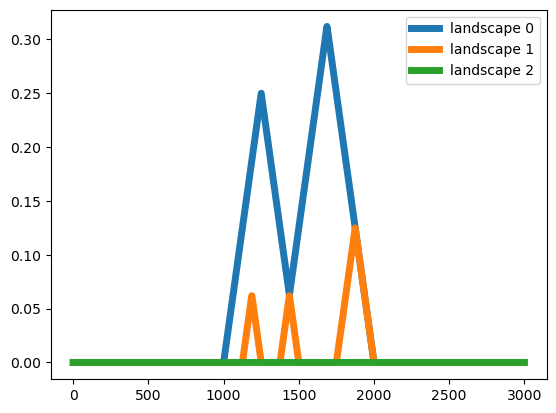

In [9]:
plt.figure()
vectors = np.reshape(vectors[0,:], [-1, 3])
for k in range(3):
    plt.plot(vectors[:,k], linewidth=5., label='landscape ' + str(k))
plt.legend()
plt.show()

In [10]:
with tf.GradientTape() as tape:
    
    rho = tf.identity 
    phi = gdtf.FlatPerslayPhi(np.array(np.arange(-1.,2.,.001), dtype=np.float32), 50.)
    weight = gdtf.PowerPerslayWeight(1.,0.)
    perm_op = tf.math.reduce_sum
    
    perslay = gdtf.Perslay(phi=phi, weight=weight, perm_op=perm_op, rho=rho)
    vectors = perslay(diagrams)
    
print('Gradient is ', tape.gradient(vectors, phi.samples))

Gradient is  tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(3000,), dtype=float32)


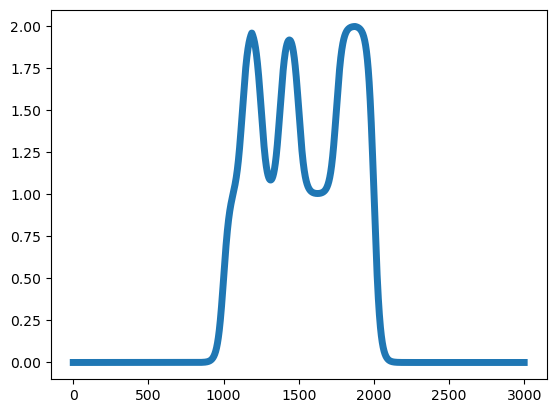

In [11]:
plt.figure()
plt.plot(vectors[0,:], linewidth=5.)
plt.show()

In [12]:
with tf.GradientTape() as tape:
    
    rho = tf.keras.layers.Conv2D(3,5)
    phi = gdtf.GaussianPerslayPhi((100, 100), ((-.5, 1.5), (-.5, 1.5)), .1)
    weight = gdtf.PowerPerslayWeight(1.,2.)
    perm_op = tf.math.reduce_sum
    
    perslay = gdtf.Perslay(phi=phi, weight=weight, perm_op=perm_op, rho=rho)
    vectors = perslay(diagrams)
    
print('Gradient is ', tape.gradient(vectors, phi.variance))

Gradient is  tf.Tensor(-0.3671875, shape=(), dtype=float32)


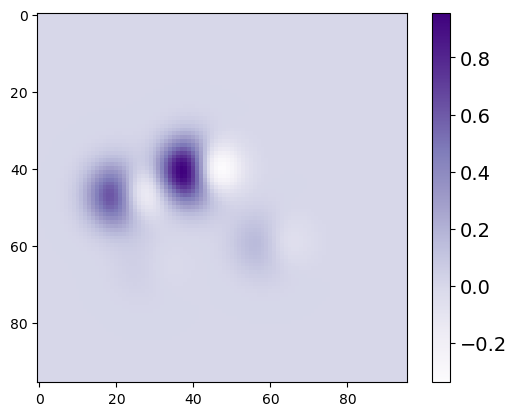

In [13]:
plt.figure()
plt.imshow(np.flip(vectors[0,:,:,0],0), cmap="Purples")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [14]:
with tf.GradientTape() as tape:
    
    rho = tf.identity
    phi = gdtf.GaussianPerslayPhi((100, 100), ((-.5, 1.5), (-.5, 1.5)), .05)
    weight = gdtf.GaussianMixturePerslayWeight(np.array([[0.],[.25],[1],[1]], dtype=np.float32))
    perm_op = tf.math.reduce_sum
    
    perslay = gdtf.Perslay(phi=phi, weight=weight, perm_op=perm_op, rho=rho)
    vectors = perslay(diagrams)

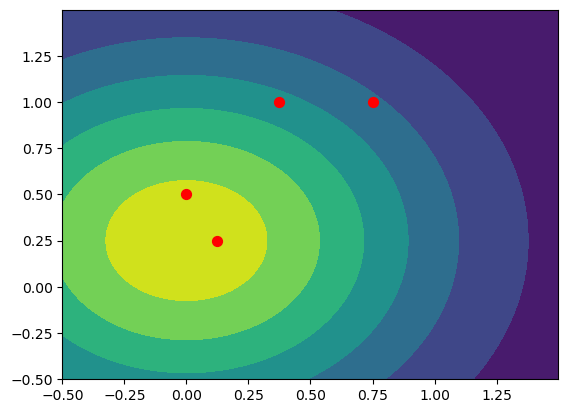

In [15]:
means = weight.W[:2,:].numpy()
varis = weight.W[2:,:].numpy()
x, y = np.arange(-.5, 1.5, .001), np.arange(-.5, 1.5, .001)
xx, yy = np.meshgrid(x, y)
z = np.zeros(xx.shape)
for idx_g in range(means.shape[1]):
    z += np.exp(-((xx-means[0,idx_g])**2 * (varis[0,idx_g])**2 + (yy-means[1,idx_g])**2 * (varis[1,idx_g])**2 ))
plt.contourf(xx, yy, z)
plt.scatter(diagrams[0][:,0], diagrams[0][:,1], s=50, color="red")
plt.show()

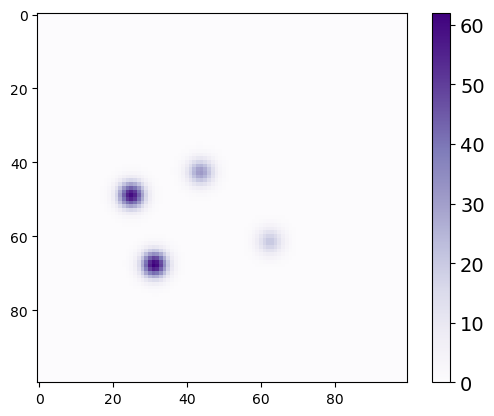

In [16]:
plt.figure()
plt.imshow(np.flip(vectors[0,:,:,0],0), cmap="Purples")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [17]:
with tf.GradientTape() as tape:
    
    rho = tf.identity
    phi = gdtf.GaussianPerslayPhi((100, 100), ((-.5, 1.5), (-.5, 1.5)), .1)
    weight = gdtf.GridPerslayWeight(np.array(
        np.random.uniform(size=[100,100]),dtype=np.float32),((-0.01, 1.01),(-0.01, 1.01)))
    perm_op = tf.math.reduce_sum
    
    perslay = gdtf.Perslay(phi=phi, weight=weight, perm_op=perm_op, rho=rho)
    vectors = perslay(diagrams)

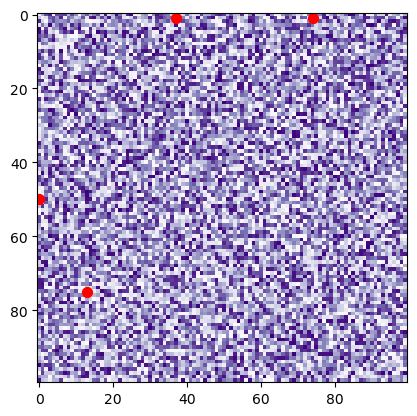

In [18]:
W = np.flip(weight.grid.numpy(), 0)
plt.figure()
plt.imshow(W, cmap="Purples", zorder=1)
((xm,xM),(ym,yM)) = weight.grid_bnds
[xs, ys] = weight.grid.shape
plt.scatter([int(xs*(x-xm)/(xM-xm)) for x in diagrams[0][:,0]], 
            [ys-int(ys*(y-ym)/(yM-ym)) for y in diagrams[0][:,1]], 
            s=50, color="red", zorder=2)
plt.show()

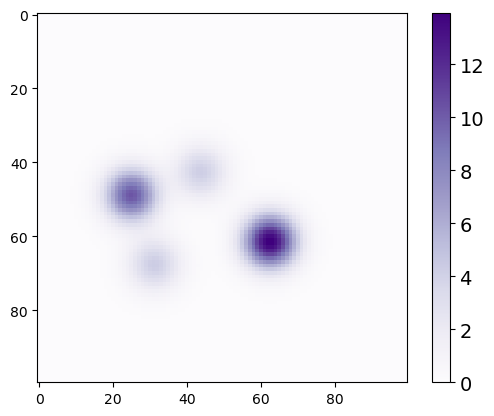

In [19]:
plt.figure()
plt.imshow(np.flip(vectors[0,:,:,0],0), cmap="Purples")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()